In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 1

In [46]:
data = pd.read_csv('owid-covid-data.csv')

In [47]:
data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [48]:
russian_data = data[data['location']=='Russia']

In [49]:
russian_data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
13712,RUS,Russia,2019-12-31,0,0,0,0,0.0,0.0,0.0,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
13713,RUS,Russia,2020-01-01,0,0,0,0,0.0,0.0,0.0,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
13714,RUS,Russia,2020-01-02,0,0,0,0,0.0,0.0,0.0,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
13715,RUS,Russia,2020-01-03,0,0,0,0,0.0,0.0,0.0,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
13716,RUS,Russia,2020-01-04,0,0,0,0,0.0,0.0,0.0,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05


In [50]:
russian_data['new_cases'] = russian_data['new_cases'].apply(lambda x: 1 if x == 0 else x)

/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
russian_data = russian_data[['date', 'total_cases', 'new_cases']]

In [52]:
russian_data['date'] = pd.to_datetime(russian_data['date'])

In [56]:
russian_data = russian_data[russian_data['date'] >= pd.to_datetime('03.03.2020', dayfirst=True)]

In [58]:
train_col = [True]*50 + [False]*(russian_data.shape[0] - 50)

In [59]:
russian_data['train'] = train_col

/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
russian_data['date']

,date,total_cases,new_cases,train
13775,2020-03-03,3,1,True
13776,2020-03-04,4,1,True
13777,2020-03-05,4,1,True
13778,2020-03-06,4,1,True
13779,2020-03-07,10,6,True


/Users/aqice/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


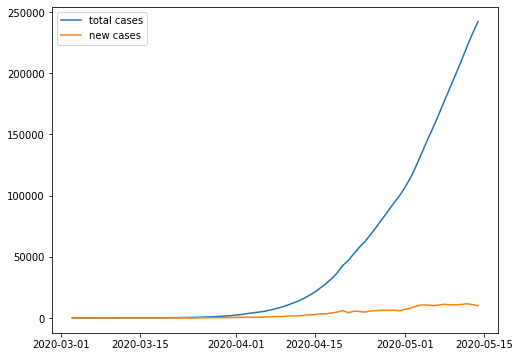

In [64]:
plt.figure(figsize=(8,6))
plt.plot(russian_data['date'], russian_data['total_cases'], label='total cases')
plt.plot(russian_data['date'], russian_data['new_cases'], label='new cases')
plt.legend()
plt.show()

In [69]:
from sklearn.linear_model import LinearRegression

In [97]:
train = russian_data[russian_data['train'] == True]['total_cases'].values
test = russian_data[russian_data['train'] == False]['total_cases'].values


In [ ]:
russian_data = russian_data.reset_index()

In [96]:
train_idx = np.array(list(russian_data[russian_data['train'] == True].index)) 
test_idx = np.array(list(russian_data[russian_data['train'] == False].index)) 

In [120]:
all_data = russian_data['total_cases'].values
all_idx = list(train_idx) + list(test_idx)

In [138]:
russian_data.head()

,level_0,index,date,total_cases,new_cases,train
0,0,13775,2020-03-03,3,1,True
1,1,13776,2020-03-04,4,1,True
2,2,13777,2020-03-05,4,1,True
3,3,13778,2020-03-06,4,1,True
4,4,13779,2020-03-07,10,6,True


In [ ]:
russian_data = russian_data.reset_index()

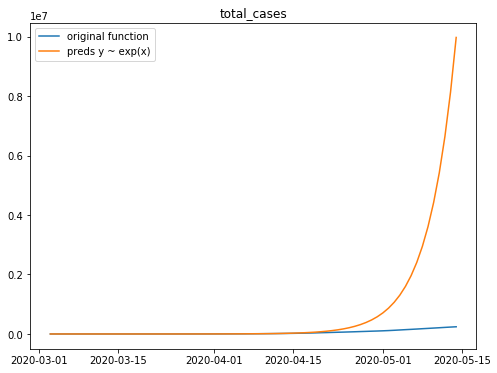

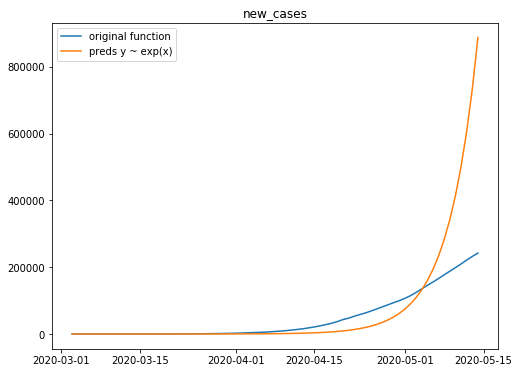

In [140]:
for target in ['total_cases', 'new_cases']:
    
    train = russian_data[russian_data['train'] == True][target].values
    test = russian_data[russian_data['train'] == False][target].values

    
    train_idx = np.array(list(russian_data[russian_data['train'] == True].index)) 
    test_idx = np.array(list(russian_data[russian_data['train'] == False].index)) 
    
    

    all_data = russian_data['total_cases'].values
    all_idx = list(train_idx) + list(test_idx)
    
    lin_reg = LinearRegression()

    train_log = np.log(train)

    lin_reg.fit(train_idx.reshape(-1, 1), train_log.reshape(-1, 1))


    preds = np.exp(lin_reg.predict(np.array(all_idx).reshape(-1, 1)))

    plt.figure(figsize=(8, 6))
    plt.title(target)

    plt.plot(russian_data['date'], russian_data['total_cases'], label='original function')
    plt.plot(russian_data['date'], preds, label='preds y ~ exp(x)')

    plt.legend()
    plt.show()

In [162]:
X = np.hstack((np.ones((len(train_idx.reshape(-1, 1)), 1)), train_idx.reshape(-1, 1)))

In [163]:
preds = np.exp(lin_reg.predict(test_idx.reshape(-1, 1)))
var = np.var(test - preds)
alpha = 1 / var 

In [164]:
init_mu = np.array([0, 0])
init_sigma = 20 * np.array([[1, 0], [0, 1]])

In [166]:
sigma = np.linalg.inv(np.linalg.inv(init_sigma) + alpha * X.T @ X)
mu = sigma @ (np.linalg.inv(init_sigma) @ init_mu + alpha * X.T @ train)

In [173]:
sample_values = np.random.multivariate_normal(mu, sigma, 100)

In [171]:
print('mu', mu)
print('sigma', sigma)

mu [1.57427138e-05 6.67675233e-04]
sigma [[ 1.99999997e+01 -8.18439870e-06]
 [-8.18439870e-06  1.99997299e+01]]


In [189]:
mu

array([1.57427138e-05, 6.67675233e-04])

In [198]:
X = np.linspace(-3, 3, 1000)
Y = np.linspace(-3, 3, 1000)
X, Y = np.meshgrid(X, Y)

pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y



Z = ss.multivariate_normal.pdf(pos, mean=mu, cov=sigma)

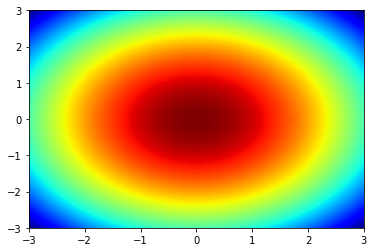

In [199]:
plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)

In [200]:
target = 'total_cases'

train = russian_data[russian_data['train'] == True][target].values
test = russian_data[russian_data['train'] == False][target].values

train_idx = np.array(list(russian_data[russian_data['train'] == True].index)) 
test_idx = np.array(list(russian_data[russian_data['train'] == False].index)) 

all_data = russian_data['total_cases'].values
all_idx = list(train_idx) + list(test_idx)

In [205]:
np.random.randn(50 )

array([-0.54924722,  2.46596562,  0.56294198,  0.1765127 , -0.11758799,
       -0.1435012 , -1.09862892, -1.04363293,  0.93617413,  1.48392035,
       -0.07517317,  1.76896556, -1.94539528, -0.3151881 ,  0.02483621,
       -1.39401207,  1.12729176, -0.62694311,  2.92745753, -0.12775449,
        0.67208266, -0.0926068 ,  1.05197699,  0.51378039,  0.31225754,
        0.88236544, -0.71984136, -0.7975249 , -0.82245994, -0.36877099,
       -0.08732174, -0.60162147, -0.2216084 ,  0.26733874, -0.97997732,
       -1.60109934, -0.98841084, -0.25584092, -0.70467367, -0.38639569,
        1.83521892,  0.872304  , -0.99554809, -0.41378725,  0.50068178,
        0.44211135, -0.10579663,  1.10157311,  2.50296258, -0.42690605])

In [207]:
import warnings
warnings.filterwarnings("ignore")

In [214]:
russian_data['date'][:-10]

0    2020-03-03
1    2020-03-04
2    2020-03-05
3    2020-03-06
4    2020-03-07
        ...    
58   2020-04-30
59   2020-05-01
60   2020-05-02
61   2020-05-03
62   2020-05-04
Name: date, Length: 63, dtype: datetime64[ns]

In [215]:
may_1_id = 59
june_1_id = 89
sep_1_id = 179

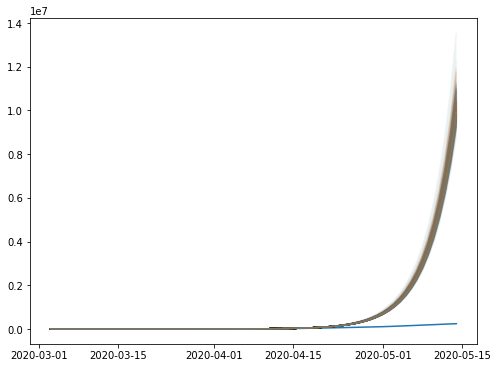

In [219]:
plt.figure(figsize=(8, 6))
plt.plot(russian_data['date'], russian_data['total_cases'])

may_1_res = []
june_1_res = []
sep_1_res = []

for _ in range(500):
    
    train_noise = np.abs(train + np.random.randn(len(train)))
    
    lin_reg = LinearRegression()

    train_log = np.log(train_noise)

    lin_reg.fit(train_idx.reshape(-1, 1), train_log.reshape(-1, 1))

    preds = np.exp(lin_reg.predict(np.array(all_idx).reshape(-1, 1)))
    
    preds_dates = np.exp(lin_reg.predict(np.array([may_1_id, june_1_id, sep_1_id]).reshape(-1, 1)))
    may_1_res.append(preds_dates[0])
    june_1_res.append(preds_dates[1])
    sep_1_res.append(preds_dates[2])

    plt.plot(russian_data['date'], preds, alpha=0.05)

In [220]:
np.percentile(may_1_res, [2.5, 97.5])

array([675554.58082758, 789933.93597407])

In [221]:
print('to May the 1st:', np.percentile(may_1_res, [2.5, 97.5]))
print('to June the 1st:', np.percentile(june_1_res, [2.5, 97.5]))
print('to September the 1st:', np.percentile(sep_1_res, [2.5, 97.5]))

to May the 1st: [675554.58082758 789933.93597407]
to June the 1st: [2.83706033e+08 3.98076246e+08]
to September the 1st: [2.10389373e+16 5.09439766e+16]


# 3

In [224]:
russian_data.head()

,level_0,index,date,total_cases,new_cases,train
0,0,13775,2020-03-03,3,1,True
1,1,13776,2020-03-04,4,1,True
2,2,13777,2020-03-05,4,1,True
3,3,13778,2020-03-06,4,1,True
4,4,13779,2020-03-07,10,6,True


use cumulative dist function of norm dist as sigmoid for total cases:

total cases function = cumulative function for new cases function

1. make modelling for ln(y) with polynomial of 2nd degree with linear regression
ln(y) = ax^2+bx+c

2. integrate resulted function to get total cases

In [258]:
train = russian_data[russian_data['train']==True]['new_cases']
test = russian_data[russian_data['train']==False]['new_cases']

In [259]:
X_train = np.array([train_idx, (train_idx) ** 2]).T
X_test = np.array([test_idx, (test_idx) ** 2]).T

In [260]:
y_log = np.log(train)

In [264]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train, y_log)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [265]:
y_train_new_sigmoid = np.exp(lin_reg.predict(X_train))
y_test_new_sigmoid = np.exp(lin_reg.predict(X_test))

y_train_total_sigmoid = y_train_new_sigmoid.cumsum()
y_test_total_sigmoid = y_train_total_sigmoid.max() + y_test_new_sigmoid.cumsum()

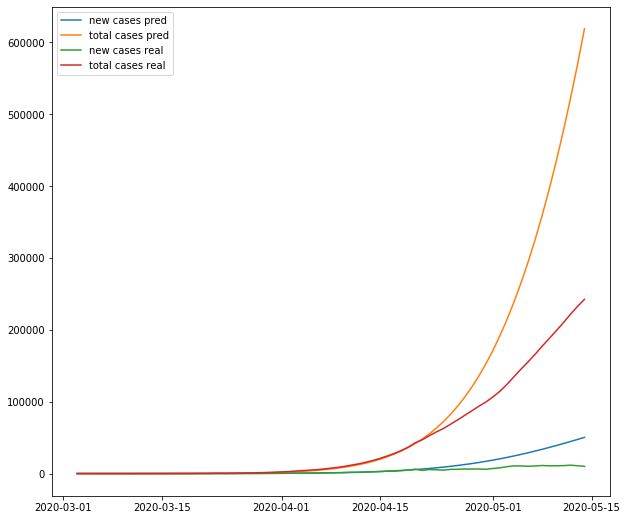

In [266]:
plt.figure(figsize=(10,9))

plt.plot(russian_data['date'], list(y_train_new_sigmoid) + list(y_test_new_sigmoid), label='new cases pred')

plt.plot(russian_data['date'], list(y_train_total_sigmoid) + list(y_test_total_sigmoid), label='total cases pred')


plt.plot(russian_data['date'], russian_data['new_cases'], label='new cases real')

plt.plot(russian_data['date'], russian_data['total_cases'], label='total cases real')


plt.legend()

probably for correct sigmoid prediction we need to take more data in test

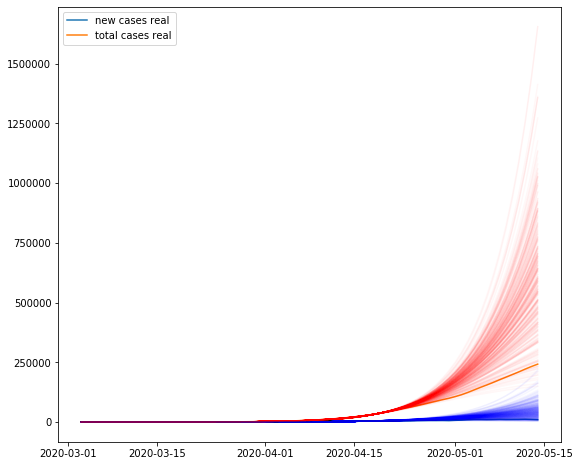

In [273]:
plt.figure(figsize=(9, 8))
plt.plot(russian_data['date'], russian_data['new_cases'], label='new cases real')

plt.plot(russian_data['date'], russian_data['total_cases'], label='total cases real')

for _ in range(300):
    
    y_log = np.log(np.abs(train + np.random.randn(len(train))))
    lin_reg = LinearRegression(normalize=True)
    lin_reg.fit(X_train, y_log)
    
    y_train_new_sigmoid = np.exp(lin_reg.predict(X_train))
    y_test_new_sigmoid = np.exp(lin_reg.predict(X_test))

    y_train_total_sigmoid = y_train_new_sigmoid.cumsum()
    y_test_total_sigmoid = y_train_total_sigmoid.max() + y_test_new_sigmoid.cumsum()

    plt.plot(russian_data['date'], list(y_train_new_sigmoid) + list(y_test_new_sigmoid), alpha=0.03, c='b')

    plt.plot(russian_data['date'], list(y_train_total_sigmoid) + list(y_test_total_sigmoid), alpha=0.03, c='r')



    plt.legend()